In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('training/training.csv');
test_data = pd.read_csv('test/test.csv');
lookid_data = pd.read_csv('IdLookupTable.csv');

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
lookid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.7+ KB


In [5]:
lookid_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [7]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [9]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [10]:
train_data.fillna(method = 'ffill',inplace = True)

In [11]:
training = train_data

In [12]:
training

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...


In [13]:
training.shape,type(training)

((7049, 31), pandas.core.frame.DataFrame)

In [14]:
training['Image'] = training['Image'].apply(lambda x:np.fromstring(x,dtype=int,sep = ' ').reshape((96,96)))

In [15]:
def get_image_and_dots(df,index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1],df.loc[index][i],'ro'))
    return image,l

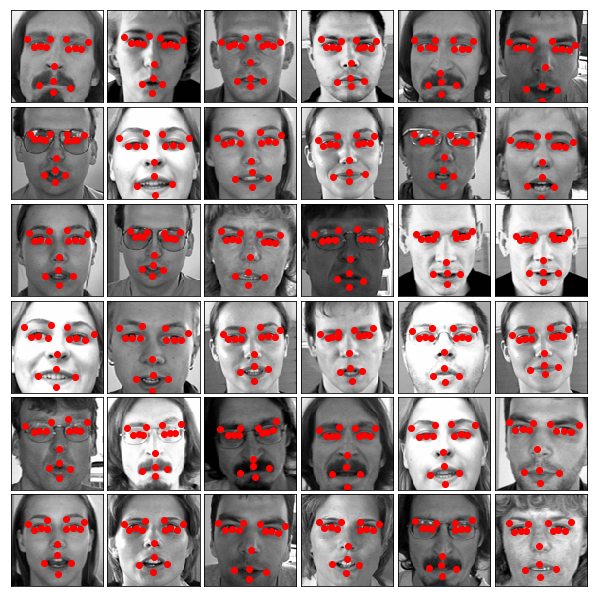

In [16]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i)

plt.show()

In [17]:
X = np.asarray([training['Image']],dtype = np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'],axis=1)

In [18]:
X.shape

(7049, 96, 96, 1)

In [19]:
y.shape

(7049, 30)

In [20]:
type(X),type(y)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,AvgPool2D,BatchNormalization,Dropout,Activation,MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D

Using TensorFlow backend.
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framewo

In [23]:
model = Sequential()

model.add(Convolution2D(32,(3,3),padding='same',use_bias = False,input_shape = (96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [24]:
model.add(Convolution2D(32,(3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

In [25]:
model.add(Convolution2D(64,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [26]:
model.add(Convolution2D(64,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

In [27]:
model.add(Convolution2D(96,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [28]:
model.add(Convolution2D(96,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

In [29]:
model.add(Convolution2D(128,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [30]:
model.add(Convolution2D(128,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

In [31]:
model.add(Convolution2D(256,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [32]:
model.add(Convolution2D(256,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

In [33]:
model.add(Convolution2D(512,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [34]:
model.add(Convolution2D(512,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [35]:
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

In [36]:
model.compile(optimizer = 'Adam',loss='mse',metrics=['mae'])

In [37]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
4934/4934 [==============================] - 1067s 216ms/step - loss: 73.7987 - mean_absolute_error: 5.0838
Epoch 2/10
4934/4934 [==============================] - 1087s 220ms/step - loss: 17.9638 - mean_absolute_error: 3.1927
Epoch 3/10
4934/4934 [==============================] - 1044s 212ms/step - loss: 15.3481 - mean_absolute_error: 2.9305
Epoch 4/10
4934/4934 [==============================] - 1077s 218ms/step - loss: 12.8997 - mean_absolute_error: 2.6724
Epoch 5/10
4934/4934 [==============================] - 1071s 217ms/step - loss: 11.8921 - mean_absolute_error: 2.5531
Epoch 6/10
4934/4934 [==============================] - 959s 194ms/step - loss: 10.9795 - mean_absolute_error: 2.4499
Epoch 7/10
4934/4934 [==============================] - 903s 183ms/step - loss: 9.8314 - mean_absolute_error: 2.3057
Epoch 8/10
4934/4934 [==============================] - 941s 191ms/step - loss: 9.3095 - mean_absolute_error: 2.2431
Epoch 9/10
4934/4934 [==============================]

In [38]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])

Test loss: 4.832285621543866
Test accuracy 1.394730104847721


In [39]:
model.save('face_recognition_cnn.h5')

In [40]:
test = test_data

In [41]:
test['Image'] = test['Image'].apply(lambda x:np.fromstring(x,dtype=int,sep=' ').reshape((96,96)))

In [42]:
test.shape,type(test)

((1783, 2), pandas.core.frame.DataFrame)

In [43]:
test_X = np.asarray([test['Image']],dtype=np.uint8).reshape(test.shape[0],96,96,1)

In [44]:
test_res = model.predict(test_X)

In [45]:
train_predicts = model.predict(X_train)

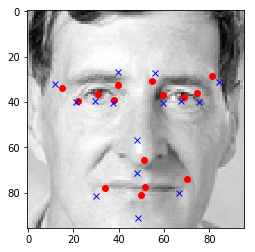

In [46]:
n = 7
xv = X_train[n].reshape((96,96))
plt.imshow(xv,cmap='gray')
for i in range(1,31,2):
    plt.plot(train_predicts[n][i-1],train_predicts[n][i],'ro')
    plt.plot(y_train.loc[n][i-1],y_train.loc[n][i],'x',color='blue')
plt.show()

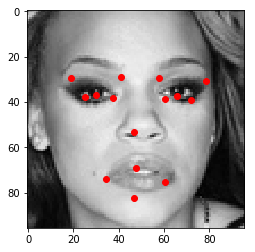

In [47]:
n = 200
xt = X_test[n].reshape((96,96))
plt.imshow(xt,cmap='gray')
for i in range(1,31,2):
    plt.plot(test_res[n][i-1],test_res[n][i],'ro')
plt.show()

In [61]:
def get_image_and_dots1(df,index,test_res):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(test_res[index][i-1],test_res[index][i],'o',color="orange"))
    return image,l

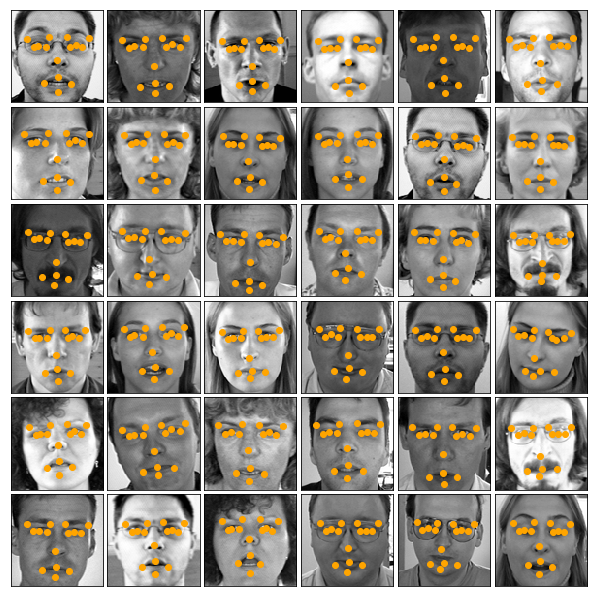

In [62]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    get_image_and_dots1(test_data, i,test_res)
plt.show()

In [50]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(test_res)

In [51]:
rowid = lookid_data['RowId']
rowid = list(rowid)

In [52]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [53]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [54]:
rowid = pd.Series(rowid,name='RowId')
loc = pd.Series(preded,name="Location")

In [55]:
submission = pd.concat([rowid,loc],axis = 1)
submission.head(20)

In [56]:
submission.to_csv('detection_submission02.csv',index = False)